In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import control as ct
from sympy import expand, symbols


z^2 - 2 z + 1
-------------
z^2 - 2 z + 1

dt = 2.559967232419425e-08

[1, 1.0, -2.0001608412742837, 1.0001608477422723, -2.0000032104842984, 1.0000032169548745]


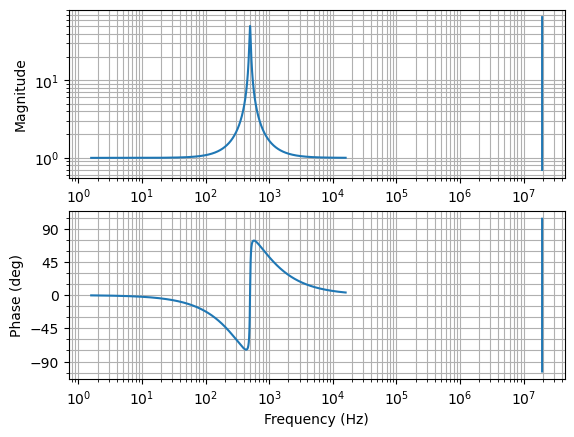

In [319]:
zero_low = 500*2*np.pi #Frequency in hertz where you want resonance
delta = 10 *2*np.pi #FWHM (?) of resonance in hertz. Don't make delta/zero_low > 1/5.
pole_low = (zero_low*1j+delta)
pole_low_cc = (-zero_low*1j+delta)
gain = 1. #overall gain

a,b = signal.zpk2tf([zero_low, zero_low],[pole_low, pole_low_cc],gain)
dt = 1/39063000. #1/sampling rate of moku at its fastest speed

discreteZPK = signal.cont2discrete(([zero_low, zero_low],[pole_low, pole_low_cc],gain), dt) #create discrete ZPK TF
discreteSOS = signal.zpk2sos(discreteZPK[0], discreteZPK[1], discreteZPK[2]) #convert to SOS form
discreteSOS = list(discreteSOS[0])

#uncomment for sanity check
controlZPK = ct.zpk(discreteZPK[0], discreteZPK[1], discreteZPK[2],dt=dt)
ct.bode(controlZPK,omega = np.arange(10,1e5),Hz = True)

discreteTF = ct.tf(controlZPK)
print(discreteTF)

discreteSOS.pop(3) ######This line and the line below are because the moku wants a very specific form. The Z^2 term in the moku is normalized to 1. We technically should normalize the denominator 
discreteSOS.insert(0,1) #coefficients by this element AND THEN remove it but i think the sampling rate is fast enough to not matter.

print(discreteSOS)

np.savetxt('res_filt_moku.csv', [discreteSOS], delimiter=',')

In [ ]:
# x, flow, fhigh, delta = symbols('x, flow, fhigh, delta')

# flow = 200 #a
# fhigh = 900 #c
# delta = 500 #b
# gain = (-flow-delta)*(-fhigh+delta)/(flow*fhigh)


# num_unfoiled = gain*(x-flow)*(x-fhigh)
# denom_unfoiled = (x-flow-delta*1j)*(x-fhigh+delta*1j)

# numerator = expand(num_unfoiled)
# denominator = expand(denom_unfoiled)

# num_coeffs = numerator.as_poly().all_coeffs()
# denom_coeffs = denominator.as_poly().all_coeffs()

# new_num_coeffs = []
# new_denom_coeffs = []

# for i in np.arange(len(num_coeffs)):
#     new_num_coeffs.append(float(num_coeffs[i]))
# for j in np.arange(len(denom_coeffs)):
#         new_denom_coeffs.append(float(denom_coeffs[j]))

# test3 = ct.TransferFunction(new_num_coeffs, new_denom_coeffs)
# print()

# ct.bode(test3,plot = True);